In [1]:
import torch
import torch.nn as nn
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, TensorDataset
from torchvision.utils import save_image

from google.colab import drive
drive.mount('/content/gdrive')

# 랜덤 시드 설정
torch.manual_seed(321)

# 이미지 크기를 128 x 128 로 조정합니다
IMAGE_SIZE = 128

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# GPU 사용 가능일 경우 랜덤 시드 고정
if device == 'cuda':
    torch.cuda.manual_seed_all(321)

Mounted at /content/gdrive


In [3]:
# 이미지 폴더로부터 데이터를 로드합니다.
original_dataset = ImageFolder(root='/content/gdrive/MyDrive/flower_photos',                            # 다운로드 받은 폴더의 root 경로를 지정합니다.
                               transform=transforms.Compose([                   # Resize 후 정규화(0~1)를 수행합니다.
                                   transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), # 개와 고양이 사진 파일의 크기가 다르므로, Resize로 맞춰줍니다.
                                   transforms.ToTensor()
                               ]))

In [4]:
type(original_dataset)

torchvision.datasets.folder.ImageFolder

In [8]:
original_loader = DataLoader(original_dataset, # 이전에 생성한 original_dataset를 로드 합니다.
                             batch_size=2318,    # 배치사이즈
                             shuffle=True,     # 셔플 여부
                             num_workers=1 
                            )

In [9]:
# 전체 이미지를 추출한다.
original_images, labels = next(iter(original_loader))

# 이미지의 shape을 확인합니다. 128 X 128 RGB 이미지 임을 확인합니다. 
# (batch_size, channel, height, width)
print(original_images.shape)

torch.Size([2313, 3, 128, 128])


In [10]:
X=original_images
Y=labels

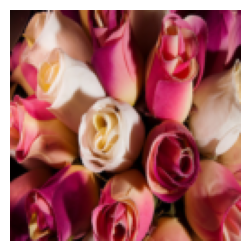

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 3))
# permute로 이미지의 shape를 다음과 같이 변경합니다
# (height, width, channel)
plt.imshow(original_images[0].permute(1, 2, 0))
plt.grid(False)
plt.axis('off')
plt.show()

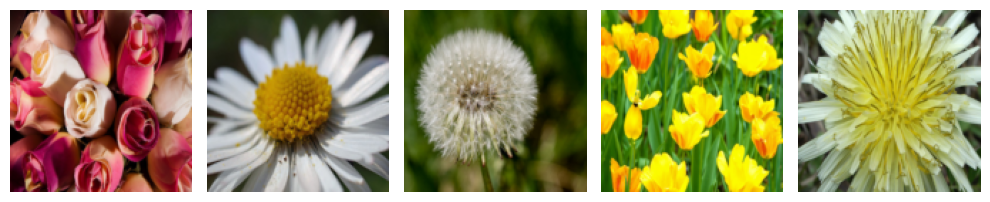

In [12]:
fig, axes = plt.subplots(1,5)
fig.set_size_inches(10, 4) #전체 fig 크기

for idx in range(5):
   axes[idx].imshow(original_images[idx].permute(1, 2, 0))
   axes[idx].set_axis_off()
fig.tight_layout()
plt.show()

In [13]:
image_transform = transforms.Compose([
    transforms.Resize((256, 256)),                    # 개와 고양이 사진 파일의 크기가 다르므로, Resize로 맞춰줍니다.
    transforms.CenterCrop((IMAGE_SIZE, IMAGE_SIZE)),  # 중앙 Crop
    transforms.ToTensor()
])
# 이미지 폴더로부터 데이터를 로드합니다.
transform_dataset = ImageFolder(root='/content/gdrive/MyDrive/flower_photos',                  # 다운로드 받은 폴더의 root 경로를 지정합니다.
                                transform=image_transform)

# 데이터 로더를 생성합니다.
transform_loader = DataLoader(transform_dataset, # 이전에 생성한 transform_dataset를 적용합니다.
                              batch_size=1000,     # 배치사이즈
                              shuffle=True,      # 셔플 여부
                              num_workers=1 
                             )

In [14]:
transform_images, labels = next(iter(transform_loader))

In [15]:
print(transform_images.shape, labels.shape)
X1=torch.cat([X, transform_images], dim=0)
Y1=torch.cat([Y, labels])
print(X1.shape, Y1.shape)

torch.Size([1000, 3, 128, 128]) torch.Size([1000])
torch.Size([3313, 3, 128, 128]) torch.Size([3313])


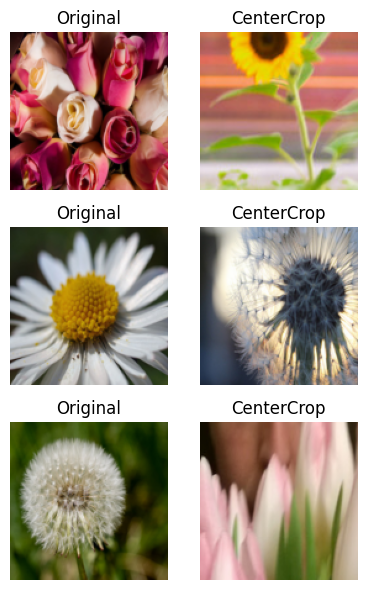

In [16]:
fig, axes = plt.subplots(3, 2)
fig.set_size_inches(4, 6)

for idx in range(3):
    axes[idx, 0].imshow(original_images[idx].permute(1, 2, 0))
    axes[idx, 0].set_axis_off()
    axes[idx, 0].set_title('Original')
    axes[idx, 1].imshow(transform_images[idx].permute(1, 2, 0))
    axes[idx, 1].set_axis_off()
    axes[idx, 1].set_title('CenterCrop')
fig.tight_layout()
plt.show()

In [17]:
def create_loader(transform):
    # 이미지 폴더로부터 데이터를 로드합니다.
    transform_dataset = ImageFolder(root='/content/gdrive/MyDrive/flower_photos', # 다운로드 받은 폴더의 root 경로를 지정합니다.
                                    transform=transform)

    # 데이터 로더를 생성합니다.
    transform_loader = DataLoader(transform_dataset,      # 이전에 생성한 transform_dataset를 적용합니다.
                                  batch_size=1000,          # 배치사이즈
                                  shuffle=True,          # 셔플 여부
                                  num_workers=1 
                                 )
    
    transform_images, labels = next(iter(transform_loader))
    
    fig, axes = plt.subplots(1, 3)
    fig.set_size_inches(8, 4)

    for idx in range(3):
        axes[idx].imshow(transform_images[idx].permute(1, 2, 0))
        axes[idx].set_axis_off()
        axes[idx].set_title('Transformed')  
    fig.tight_layout()
    plt.show()
    return transform_images, labels

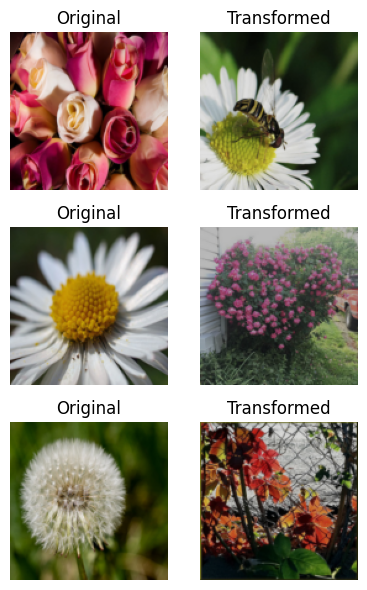

In [18]:
image_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),              
    # ColorJitter 적용
    transforms.ColorJitter(brightness=(0.7, 0.9), 
                           #contrast=(1, 1), 
                           saturation=(0.7, 0.9),
                           #hue=(-0.2, 0.2),
                          ),
    transforms.ToTensor()
])

color_tf_images, color_tf_labels=create_loader(image_transform)

In [19]:
Y2=torch.cat([Y1, color_tf_labels], dim=0)
X2=torch.cat([X1, color_tf_images], dim=0)
print(X2.shape, Y2.shape)

torch.Size([4313, 3, 128, 128]) torch.Size([4313])


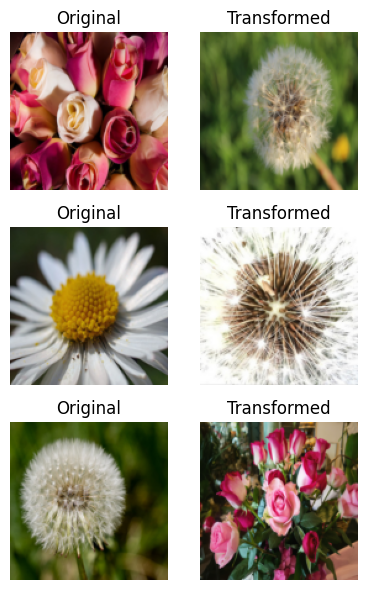

torch.Size([5313, 3, 128, 128]) torch.Size([5313])


In [20]:
image_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),              
    # RandomHorizontalFlip 적용
    transforms.RandomHorizontalFlip(p=0.8),
    transforms.ToTensor()
])

flip_tf_images, flip_tf_labels=create_loader(image_transform)
Y3=torch.cat([Y2, flip_tf_labels], dim=0)
X3=torch.cat([X2, flip_tf_images], dim=0)
print(X3.shape, Y3.shape)

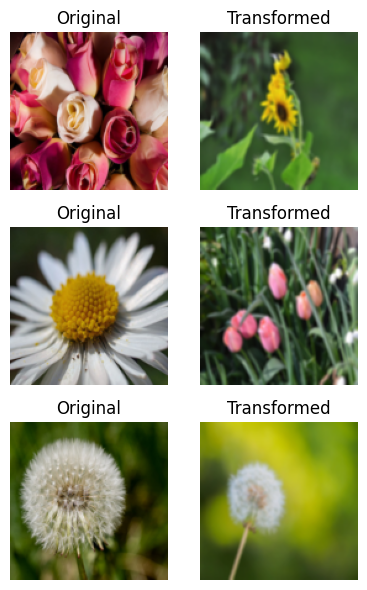

torch.Size([6313, 3, 128, 128]) torch.Size([6313])


In [21]:
image_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),              
    # GaussianBlur 적용
    transforms.GaussianBlur(kernel_size=(3, 3), sigma=(1.0, 2.0)),
    transforms.ToTensor()
])

GB_tf_images, GB_tf_labels=create_loader(image_transform)

Y4=torch.cat([Y3, GB_tf_labels], dim=0)
X4=torch.cat([X3, GB_tf_images], dim=0)
print(X4.shape, Y4.shape)

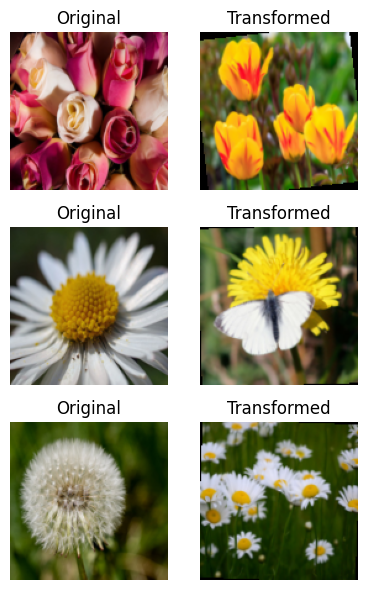

torch.Size([7313, 3, 128, 128]) torch.Size([7313])


In [22]:
image_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),              
    # RandomRotation 적용
    transforms.RandomRotation(degrees=(-10, 10), 
                              interpolation=transforms.InterpolationMode.BILINEAR, fill=0),
    transforms.ToTensor()
])

rot_tf_images, rot_tf_labels=create_loader(image_transform)
X5=torch.cat([X4, rot_tf_images], dim=0)
Y5=torch.cat([Y4, rot_tf_labels], dim=0)
print(X5.shape, Y5.shape)

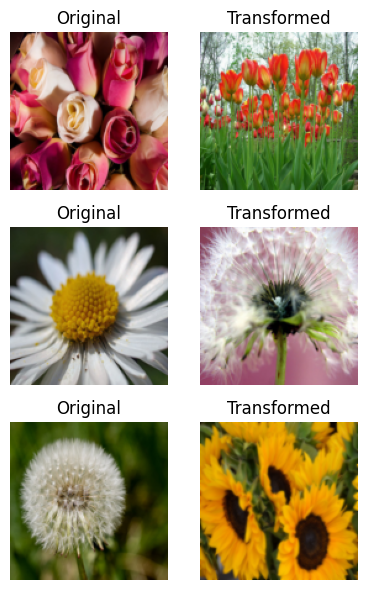

torch.Size([8313, 3, 128, 128]) torch.Size([8313])


In [23]:
image_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),              
    # RandomAdjustSharpness 적용
    transforms.RandomAdjustSharpness(sharpness_factor=0.1, p=0.9),
    transforms.ToTensor()
])

sp_tf_images, sp_tf_labels=create_loader(image_transform)
X6=torch.cat([X5, sp_tf_images], dim=0)
Y6=torch.cat([Y5, sp_tf_labels], dim=0)
print(X6.shape, Y6.shape)

In [24]:
print(Y6[0:20])

tensor([2, 0, 1, 4, 1, 2, 0, 1, 4, 2, 1, 3, 4, 2, 4, 3, 4, 4, 3, 1])


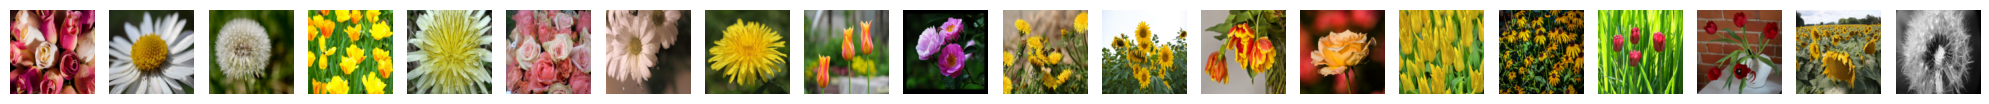

In [25]:
fig, axes = plt.subplots(1,20)
fig.set_size_inches(20, 4)

for idx in range(20):
   axes[idx].imshow(original_images[idx].permute(1, 2, 0))
   axes[idx].set_axis_off()
fig.tight_layout()
plt.show()

In [26]:
cnt0=(Y6==0).sum()
cnt1=(Y6==1).sum()
cnt2=(Y6==2).sum()
cnt3=(Y6==3).sum()
cnt4=(Y6==4).sum()
print(cnt0, cnt1, cnt2, cnt3, cnt4)

tensor(1440) tensor(2069) tensor(1563) tensor(1854) tensor(1387)


In [27]:
ratios=[.8, .2]
train_cnt = int(X6.size(0) * ratios[0])
test_cnt = int(X6.size(0) * ratios[1])
cnts = [train_cnt, test_cnt]
print("Train %d / Test %d samples." % (train_cnt, test_cnt))

x_train =X6[:cnts[0]]
x_test=X6[cnts[0]:]
y_train=Y6[:cnts[0]]
y_test=Y6[cnts[0]:]

print(x_train.size(), y_train.size())
print(x_test.size(), y_test.size())

Train 6650 / Test 1662 samples.
torch.Size([6650, 3, 128, 128]) torch.Size([6650])
torch.Size([1663, 3, 128, 128]) torch.Size([1663])


In [33]:
train_dataset=TensorDataset(x_train, y_train)
test_dataset=TensorDataset(x_test, y_test)

train_dataloader=DataLoader(train_dataset,  
                            batch_size=100,    # 배치사이즈
                            shuffle=True,     # 셔플 여부
                            )
test_dataloader=DataLoader(test_dataset)

In [34]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(
            in_channels=3,
            out_channels=8,
            kernel_size=3,
            padding=1)
        self.conv2 = nn.Conv2d(
            in_channels=8,
            out_channels=16,
            kernel_size=3,
            padding=1)
        self.pool = nn.MaxPool2d(
            kernel_size=2,
            stride=2
        )
        self.fc1 = nn.Linear(32 * 32 * 16, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = torch.relu(x)
        x = self.pool(x)

        x = x.view(-1, 32 * 32 * 16)
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = torch.relu(x)
        x = self.fc3(x)
        x = torch.log_softmax(x, dim=1)
        return x

In [35]:
device= torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

model = CNN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [37]:

def train(model, train_loader, optimizer, log_interval):
    model.train()
    for batch_idx, (image, label) in enumerate(train_loader):
        image = image.to(device)
        label = label.to(device)
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            print(f"train Epoch: {Epoch} [{batch_idx * len(image)}/{len(train_loader.dataset)}({100. * batch_idx / len(train_loader):.0f}%)]\tTrain Loss: {loss.item()}")

In [38]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(device)
            label = label.to(device)
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim=True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy


In [39]:
EPOCHS = 10
for Epoch in range(1, EPOCHS + 1):
    train(model, train_dataloader, optimizer, log_interval=100)
    test_loss, test_accuracy = evaluate(model, test_dataloader)
    print(f"\n[EPOCH: {Epoch}]\tTest Loss: {test_loss:.4f}\tTest Accuracy: {test_accuracy} % \n")

train Epoch: 1 [0/6650(0%)]	Train Loss: 2.28660249710083

[EPOCH: 1]	Test Loss: 1.0416	Test Accuracy: 57.96752856283825 % 

train Epoch: 2 [0/6650(0%)]	Train Loss: 1.0461844205856323

[EPOCH: 2]	Test Loss: 0.8909	Test Accuracy: 64.88274203247144 % 

train Epoch: 3 [0/6650(0%)]	Train Loss: 0.8117838501930237

[EPOCH: 3]	Test Loss: 0.7940	Test Accuracy: 71.61755862898376 % 

train Epoch: 4 [0/6650(0%)]	Train Loss: 0.9136400818824768

[EPOCH: 4]	Test Loss: 0.6643	Test Accuracy: 76.66867107636801 % 

train Epoch: 5 [0/6650(0%)]	Train Loss: 0.7270158529281616

[EPOCH: 5]	Test Loss: 0.6304	Test Accuracy: 76.36800962116656 % 

train Epoch: 6 [0/6650(0%)]	Train Loss: 0.5311344265937805

[EPOCH: 6]	Test Loss: 0.5091	Test Accuracy: 80.51713770294648 % 

train Epoch: 7 [0/6650(0%)]	Train Loss: 0.45761123299598694

[EPOCH: 7]	Test Loss: 0.4171	Test Accuracy: 84.36560432952496 % 

train Epoch: 8 [0/6650(0%)]	Train Loss: 0.48614779114723206

[EPOCH: 8]	Test Loss: 0.3245	Test Accuracy: 88.93565844858

In [ ]:
#모델 저장
PATH='/content/gdrive/MyDrive/model.pt'
torch.save(model.state_dict(), PATH)

In [ ]:
# 모델 로드
model=torch.load(PATH)

tensor([[3]], device='cuda:0') tensor(3)


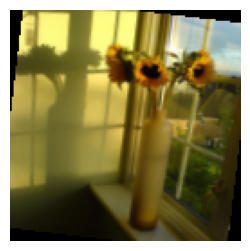

In [54]:
predict=model(x_test[30].to(device)).max(1, keepdim=True)[1]
print(predict, y_test[30])


plt.figure(figsize=(3, 3))
# permute로 이미지의 shape를 다음과 같이 변경합니다
# (height, width, channel)
plt.imshow(x_test[30].permute(1, 2, 0))
plt.grid(False)
plt.axis('off')
plt.show()

# 새 섹션

# 새 섹션